In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import requests
import scipy.sparse.linalg
import scipy as sp
import scipy.sparse

In [2]:
df = pd.read_csv("food-consumption.csv").dropna().reset_index(drop=True)
X = df.iloc[:,1:].as_matrix()
m,n = X.shape

/home/jfftilton/anaconda3/envs/int_venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [3]:
r = requests.get("https://restcountries.eu/rest/v2/region/europe")
countries = r.json()

regions = {c:{} for c in df["Country"]}

for c in countries:
    if c["name"] in regions.keys():
        regions[c["name"]] = c["subregion"]
    

regions["Holland"] = 'Western Europe'
regions["England"] = "Northern Europe"
regions = [v for k,v in regions.items()]

In [4]:
# step 1: estimate the mean and covariance matrix
mu = np.mean(X,axis =0).reshape(1,20)
X_scaled = np.subtract(X,mu)
C = np.dot(X_scaled.T,X_scaled)/m
# step 2: perform eigendecomposition on the covariance matrix
w, v = np.linalg.eig(C)
# Order the data
idx = w.argsort()[::-1]
principal_directions = v[:,idx]
# step 3: Compute reduced Representation
principal_components_ed = np.dot(X_scaled/np.sqrt(w[idx].reshape(1,20)),principal_directions.T)

/home/jfftilton/anaconda3/envs/int_venv/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


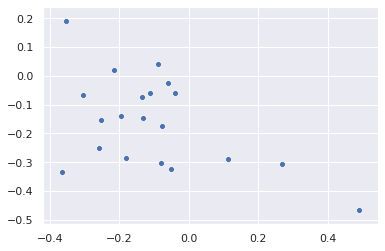

In [5]:
ax = sns.scatterplot(x=principal_directions[:,0], y=principal_directions[:,1])

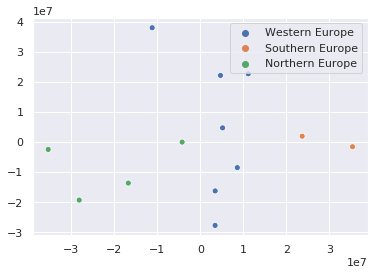

In [6]:
ax = sns.scatterplot(x=principal_components_ed[:,0], y=principal_components_ed[:,1], hue=regions)

In [7]:
# PCA using SVD
U, S, V = np.linalg.svd(X_scaled, 
      full_matrices=False,
      compute_uv=True)

principal_components_svd = np.dot(U, np.diag(S))

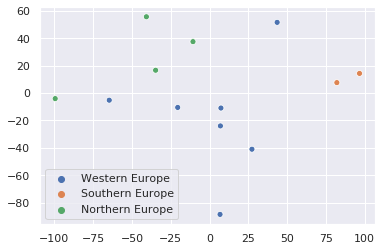

In [8]:
ax = sns.scatterplot(x=principal_components_svd[:,0], y=principal_components_svd[:,1], hue=regions)

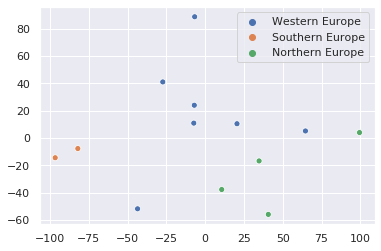

In [12]:
# PCA using Sklearn
from sklearn.decomposition import PCA
pca = PCA()
principal_components_sk = pca.fit_transform(X_scaled)
ax = sns.scatterplot(x=principal_components_sk[:,0], y=principal_components_sk[:,1], hue=regions)

In [10]:
# PCA using scipy linalg

# step 1: estimate the mean and covariance matrix
mu = np.mean(X,axis =0).reshape(1,20)
X_scaled = np.subtract(X,mu)
C = np.dot(X_scaled.T,X_scaled)/m
# step 2: perform eigendecomposition on the covariance matrix
w, v = np.linalg.eig(C)
w, v = sp.sparse.linalg.eigs(C, k=n, which='LM')
# step 3: Compute reduced Representation
principal_components_sp = np.dot(X_scaled/np.sqrt(w.reshape(1,20)),v.T)

/home/jfftilton/anaconda3/envs/int_venv/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1254: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


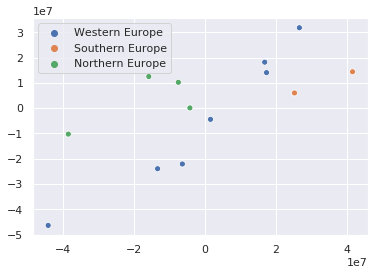

In [11]:
ax = sns.scatterplot(x=principal_components_sp[:,0], y=principal_components_sp[:,1], hue=regions)